In [1]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [61]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [80]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
Processed 75 lines.
From:  2020-01-22 To 2020-04-04


In [81]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 74
 Poland 74
  Italy 74
     US 74
Germany 74
  Spain 74
 France 74
  Japan 74


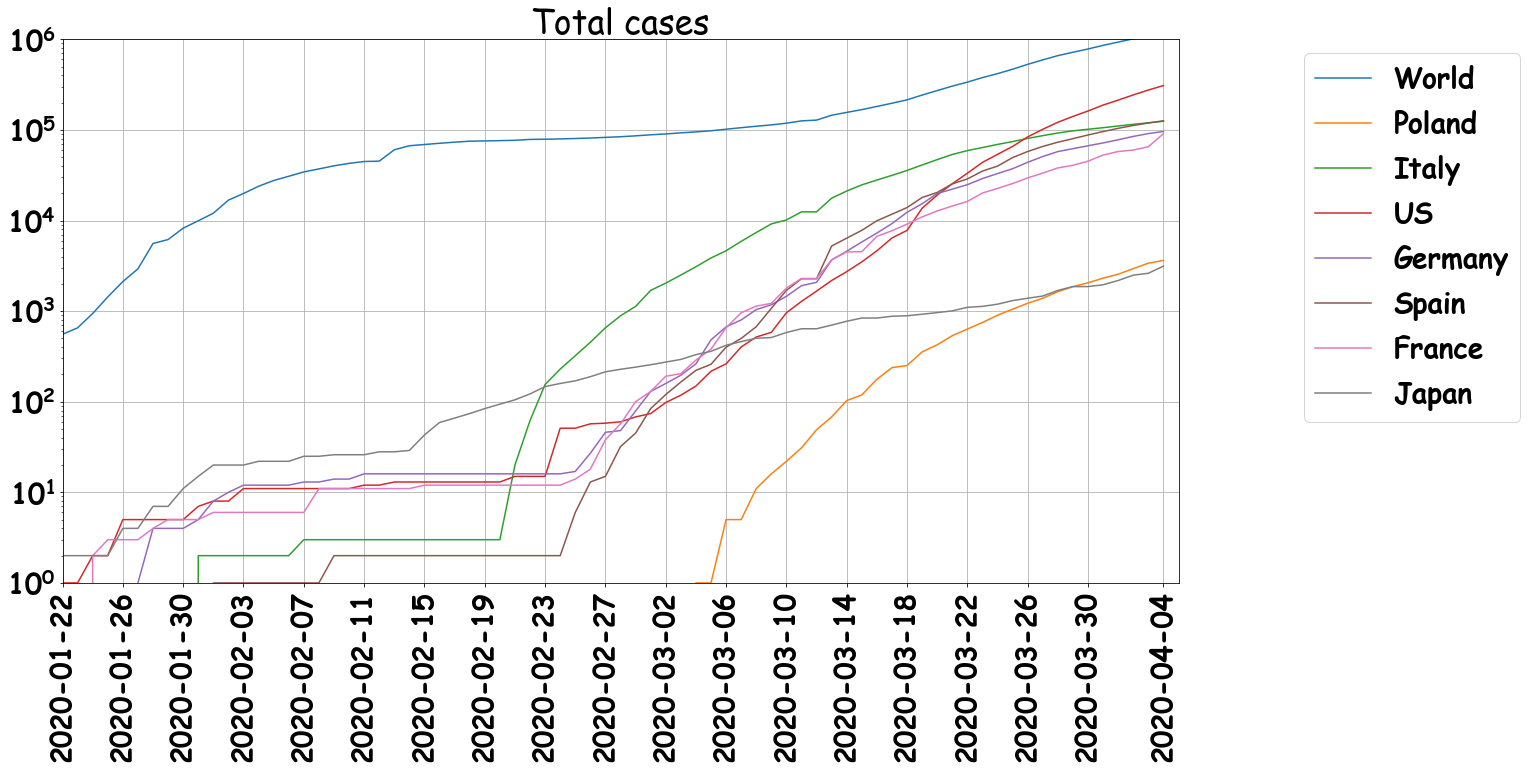

In [92]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

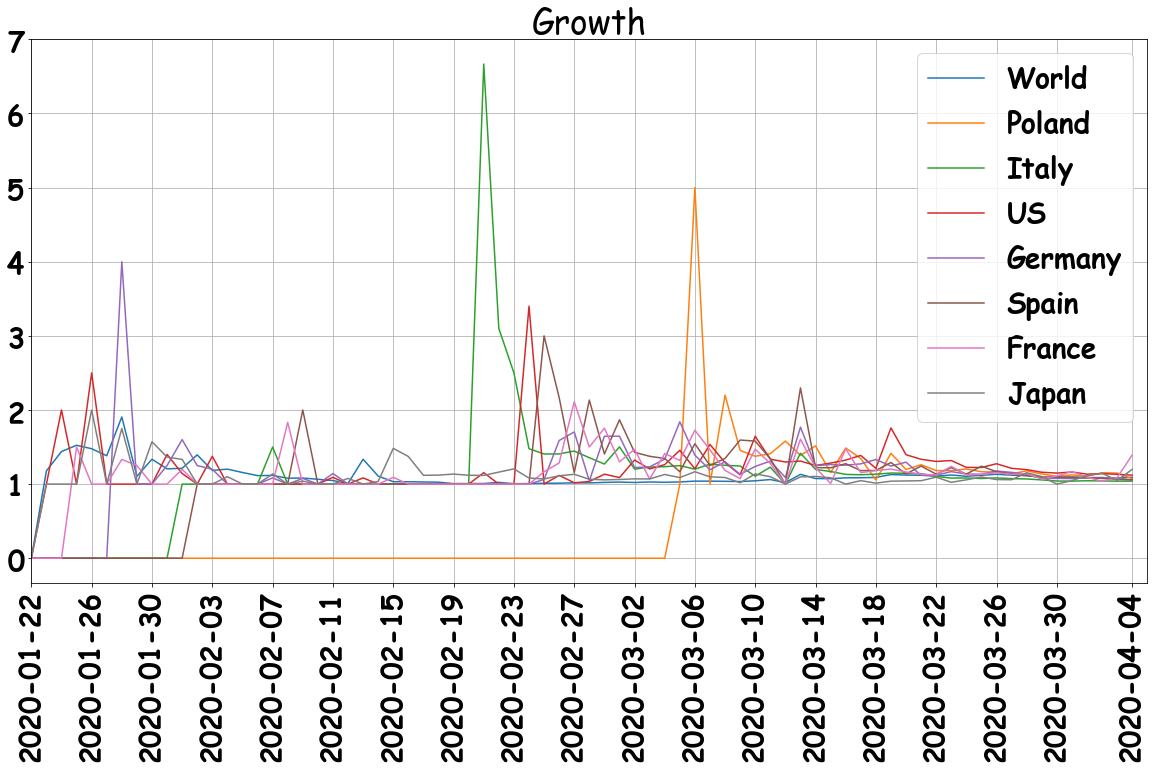

In [93]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(0, clist[0].idx[-1]+1)
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

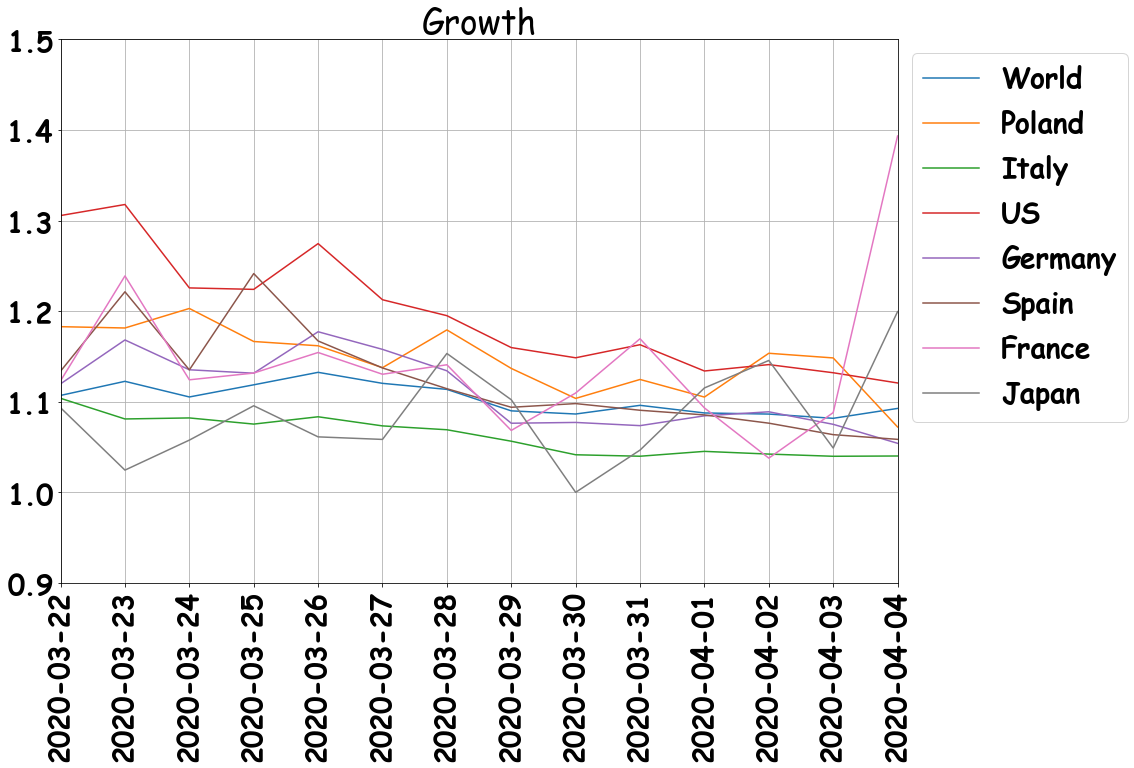

In [96]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-14], clist[0].idx[-1])
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

#### Growth averaged from first detected case

In [86]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), av)

  World 1.118767261590278
 Poland 1.3836374122035737
  Italy 1.2707765786291758
     US 1.2223062586666908
Germany 1.2195236015953643
  Spain 1.2455209499267503
 France 1.1822241014533563
  Japan 1.11586094739163


#### Growth averaged for last 14 days

In [104]:
for d in clist:
    av = np.mean([x for x in d.gf[-14:] if x])
    print("{0:>7}".format(d.name), round(av,3))

  World 1.103
 Poland 1.147
  Italy 1.062
     US 1.197
Germany 1.111
  Spain 1.123
 France 1.143
  Japan 1.086


#### Growth last day:

In [102]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>8}".format(d.con[-1]), "{0:>6}".format(d.con[-1]-d.con[-2]), round(d.gf[-1],3))

  World 2020-04-04  1197405 101488 1.093
 Poland 2020-04-04     3627    244 1.072
  Italy 2020-04-04   124632   4805 1.04
     US 2020-04-04   308850  33264 1.121
Germany 2020-04-04    96092   4933 1.054
  Spain 2020-04-04   126168   6969 1.058
 France 2020-04-04    90848  25646 1.393
  Japan 2020-04-04     3139    522 1.199


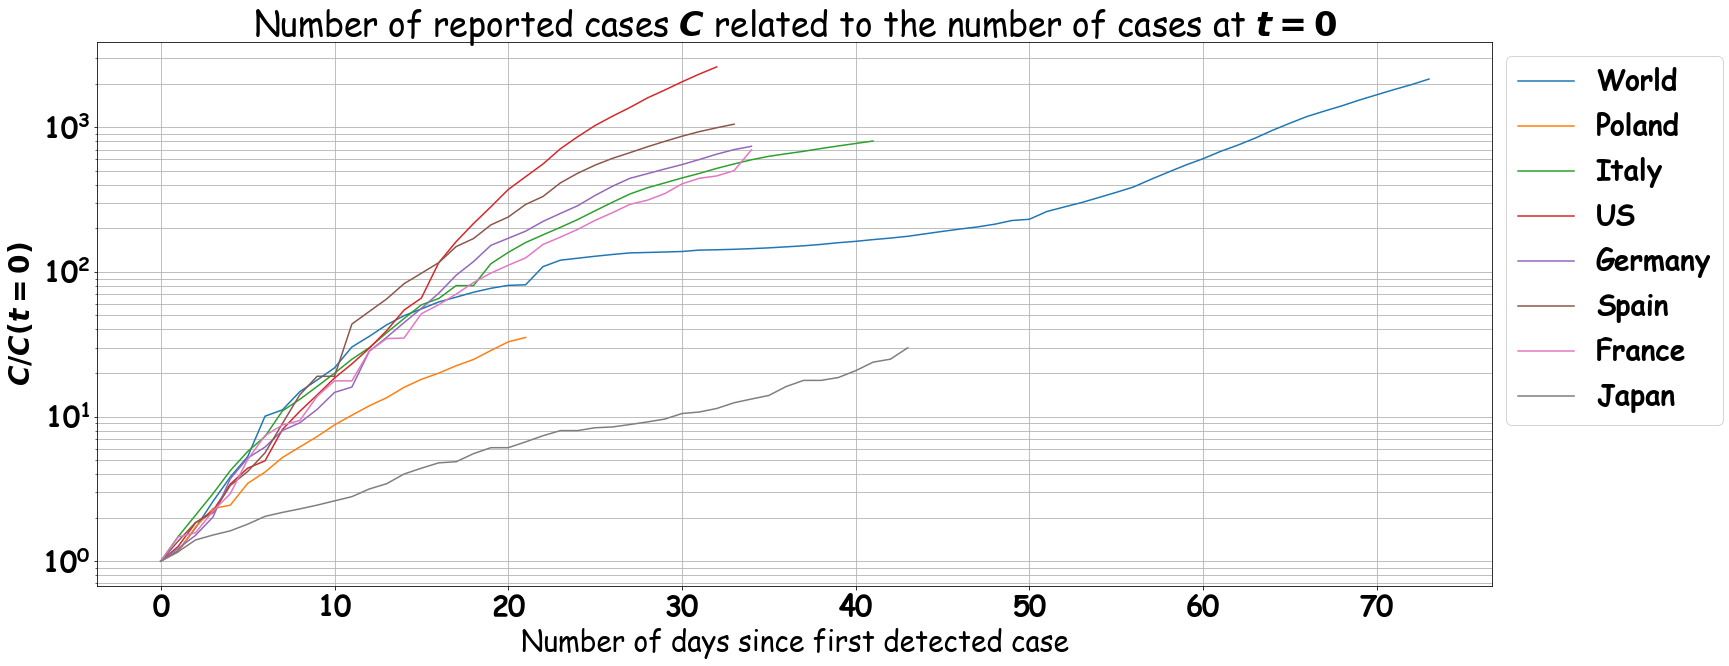

In [89]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [90]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11


In [91]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.1
    exp = round(exp)
    print(i, exp)

1 3990.0
2 4389.0
3 4828.0
4 5311.0
5 5842.0
6 6426.0
7 7069.0
8 7776.0
9 8554.0
10 9409.0
11 10350.0
12 11385.0
13 12524.0
14 13776.0
15 15154.0
16 16669.0
17 18336.0
18 20170.0
19 22187.0
20 24406.0
21 26847.0
22 29532.0
23 32485.0
24 35734.0
25 39307.0
26 43238.0
27 47562.0
28 52318.0
29 57550.0
